<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Amirali Pourdehghan

**Student ID**: 400107553





# Logistic Regression

**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

In [25]:
## Write your code here ##
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
from google.colab import files
uploaded = files.upload()


Saving Logistic_question.csv to Logistic_question.csv


In [27]:
import shutil
shutil.move("Logistic_question.csv", "/content/drive/My Drive/Logistic_question.csv")


'/content/drive/My Drive/Logistic_question.csv'

In [28]:
import pandas as pd

# Load the dataset from the CSV file
Logistic_question_data = pd.read_csv("/content/drive/My Drive/Logistic_question.csv")

# Display the first few rows of the dataset to understand its structure and features
print("First few rows of the Logistic_question dataset:")
print(Logistic_question_data.head())

# Display the shape of the dataset
print("\nShape of the Logistic_question dataset:")
print(Logistic_question_data.shape)


First few rows of the Logistic_question dataset:
   Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0         47       11.8          4        4.5        4.5       9.65   
1         34       10.7          4        4.0        4.5       8.87   
2         26       10.4          3        3.0        3.5       8.00   
3         32       11.0          3        3.5        2.5       8.67   
4         24       10.3          2        2.0        3.0       8.21   

   Feature 7  Target  
0          1    0.92  
1          1    0.76  
2          1    0.72  
3          1    0.80  
4          0    0.65  

Shape of the Logistic_question dataset:
(400, 8)


In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class MyLogisticRegression:
    def __init__(self, input_dim):
        self.model = nn.Sequential(
            nn.Linear(input_dim, 1),
            nn.Sigmoid()
        )

    def loss_fn(self, y_pred, y_true):
        return nn.BCELoss()(y_pred, y_true)

    def fit(self, X_train, y_train, epochs=100, lr=0.01):
        optimizer = optim.SGD(self.model.parameters(), lr=lr)

        for epoch in range(epochs):
            optimizer.zero_grad()
            y_pred = self.model(X_train)
            loss = self.loss_fn(y_pred, y_train)
            loss.backward()
            optimizer.step()

            if epoch % 10 == 0:
                print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

    def predict(self, X):
        with torch.no_grad():
            self.model.eval()
            y_pred = self.model(X)
            return (y_pred >= 0.5).float()

# Load dataset
data = pd.read_csv("/content/drive/My Drive/Logistic_question.csv")

# Preprocessing
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Initialize and train the model
model = MyLogisticRegression(input_dim=X_train.shape[1])
model.fit(X_train_tensor, y_train_tensor)

# Predictions
y_pred = model.predict(X_test_tensor)


Epoch 1/100, Loss: 0.7577596306800842
Epoch 11/100, Loss: 0.7480853796005249
Epoch 21/100, Loss: 0.7389706373214722
Epoch 31/100, Loss: 0.7303656339645386
Epoch 41/100, Loss: 0.7222272753715515
Epoch 51/100, Loss: 0.7145188450813293
Epoch 61/100, Loss: 0.707207977771759
Epoch 71/100, Loss: 0.7002667784690857
Epoch 81/100, Loss: 0.693670392036438
Epoch 91/100, Loss: 0.6873966455459595


**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

class MyLogisticRegression:
    def __init__(self, input_dim):
        self.model = nn.Sequential(
            nn.Linear(input_dim, 1),
            nn.Sigmoid()
        )

    def loss_fn(self, y_pred, y_true):
        return nn.BCELoss()(y_pred, y_true)

    def fit(self, X_train, y_train, epochs=100, lr=0.01):
        optimizer = optim.SGD(self.model.parameters(), lr=lr)

        for epoch in range(epochs):
            optimizer.zero_grad()
            y_pred = self.model(X_train).squeeze(1)  # Ensure predictions are a column vector
            loss = self.loss_fn(y_pred, y_train)
            loss.backward()
            optimizer.step()

            if epoch % 10 == 0:
                print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

    def predict(self, X):
        with torch.no_grad():
            self.model.eval()
            y_pred = self.model(X).squeeze(1)  # Ensure predictions are a column vector
            return (y_pred >= 0.5).float()

# Load dataset
data = pd.read_csv("/content/drive/My Drive/data_logistic.csv")

# Preprocessing
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Convert target column to binary
y_binary = (y > 0).astype(int)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Normalize the features using the mean and standard deviation of the training set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).flatten()  # Flatten the target tensor

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Initialize and train the model
model = MyLogisticRegression(input_dim=X_train.shape[1])
model.fit(X_train_tensor, y_train_tensor)

# Predictions
y_pred = model.predict(X_test_tensor)

# Evaluation
accuracy = accuracy_score(y_test, y_pred.numpy())
precision = precision_score(y_test, y_pred.numpy())
recall = recall_score(y_test, y_pred.numpy())
f1 = f1_score(y_test, y_pred.numpy())

print("Evaluation Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Epoch 1/100, Loss: 0.6703535318374634
Epoch 11/100, Loss: 0.6551795601844788
Epoch 21/100, Loss: 0.6407490372657776
Epoch 31/100, Loss: 0.6270216703414917
Epoch 41/100, Loss: 0.6139588952064514
Epoch 51/100, Loss: 0.6015231609344482
Epoch 61/100, Loss: 0.5896787047386169
Epoch 71/100, Loss: 0.5783915519714355
Epoch 81/100, Loss: 0.5676292777061462
Epoch 91/100, Loss: 0.5573612451553345
Evaluation Metrics:
Accuracy: 0.8705
Precision: 0.9602704987320372
Recall: 0.8427299703264095
F1-score: 0.8976689055709206


**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.

**Your answer:**
Sure, let's discuss each of the evaluation metrics used in this context:

1. **Accuracy**: Accuracy measures the proportion of correctly classified instances out of the total instances. It is calculated as (TP + TN) / (TP + TN + FP + FN), where TP is the number of true positives, TN is the number of true negatives, FP is the number of false positives, and FN is the number of false negatives. Accuracy provides an overall assessment of the model's performance but can be misleading if the classes are imbalanced.

2. **Precision**: Precision measures the proportion of true positive predictions among all positive predictions made by the model. It is calculated as TP / (TP + FP). Precision is useful in tasks where the cost of false positives is high, such as medical diagnosis or spam detection. A high precision indicates that the model is making fewer false positive errors.

3. **Recall (Sensitivity)**: Recall measures the proportion of true positive predictions among all actual positive instances in the data. It is calculated as TP / (TP + FN). Recall is important in tasks where missing positive instances is costly, such as disease detection or fault detection. A high recall indicates that the model is capturing a large proportion of positive instances.

4. **F1-score**: The F1-score is the harmonic mean of precision and recall, combining both measures into a single value. It is calculated as 2 * (precision * recall) / (precision + recall). The F1-score provides a balance between precision and recall and is useful when there is an uneven class distribution or when false positives and false negatives have different costs. It is particularly informative in binary classification tasks where classes are imbalanced.

In summary:
- **Accuracy** gives an overall view of the model's performance but can be misleading in imbalanced datasets.
- **Precision** is valuable when minimizing false positives is important.
- **Recall** is valuable when minimizing false negatives is important.
- **F1-score** provides a balanced measure of precision and recall, suitable for imbalanced datasets or when both false positives and false negatives are important.

**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.

In [32]:
# Your code goes here!
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset

# Preprocessing
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Convert target column to binary
y_binary = (y > 0).astype(int)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Normalize the features using the mean and standard deviation of the training set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Evaluation Metrics for Built-in Logistic Regression:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Evaluation Metrics for Built-in Logistic Regression:
Accuracy: 0.9995
Precision: 0.9992587101556709
Recall: 1.0
F1-score: 0.99962921764924


In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

class MyLogisticRegression:
    def __init__(self, input_dim):
        self.model = nn.Sequential(
            nn.Linear(input_dim, 1),
            nn.Sigmoid()
        )

    def loss_fn(self, y_pred, y_true):
        return nn.BCELoss()(y_pred, y_true)

    def fit(self, X_train, y_train, epochs=1000, lr=0.1):
        optimizer = optim.Adam(self.model.parameters(), lr=lr)

        for epoch in range(epochs):
            optimizer.zero_grad()
            y_pred = self.model(X_train).squeeze(1)  # Ensure predictions are a column vector
            loss = self.loss_fn(y_pred, y_train)
            loss.backward()
            optimizer.step()

            if epoch % 100 == 0:
                print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

    def predict(self, X):
        with torch.no_grad():
            self.model.eval()
            y_pred = self.model(X).squeeze(1)  # Ensure predictions are a column vector
            return (y_pred >= 0.5).float()

# Load dataset

# Preprocessing
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Convert target column to binary
y_binary = (y > 0).astype(int)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Normalize the features using the mean and standard deviation of the training set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).flatten()  # Flatten the target tensor

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Initialize and train the model
model = MyLogisticRegression(input_dim=X_train.shape[1])
model.fit(X_train_tensor, y_train_tensor)

# Predictions
y_pred = model.predict(X_test_tensor)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Evaluation Metrics for Custom Logistic Regression:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Epoch 1/1000, Loss: 0.7286030650138855
Epoch 101/1000, Loss: 0.0970899909734726
Epoch 201/1000, Loss: 0.0714481920003891
Epoch 301/1000, Loss: 0.05899488925933838
Epoch 401/1000, Loss: 0.05124291777610779
Epoch 501/1000, Loss: 0.04580654576420784
Epoch 601/1000, Loss: 0.04171392694115639
Epoch 701/1000, Loss: 0.03848390281200409
Epoch 801/1000, Loss: 0.03584703430533409
Epoch 901/1000, Loss: 0.033638909459114075
Evaluation Metrics for Custom Logistic Regression:
Accuracy: 0.999
Precision: 0.9992581602373887
Recall: 0.9992581602373887
F1-score: 0.9992581602373887


**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?

**Your answer:**
Comparing the custom logistic regression function with the built-in logistic regression function reveals differences in terms of performance and parameters.

**Performance:**
- Both implementations yield comparable performance in terms of evaluation metrics such as accuracy, precision, recall, and F1-score.
- The performance of the custom logistic regression function heavily depends on the implementation details, such as the choice of optimization algorithm, learning rate, and number of epochs.
- The built-in logistic regression function (from `sklearn.linear_model.LogisticRegression`) is optimized and extensively tested, offering a reliable and efficient solution out of the box.

**Parameters of Built-in Logistic Regression Function:**
- The `LogisticRegression` class in scikit-learn offers various parameters to fine-tune the model:
  - `penalty`: Specifies the norm used in the penalization (e.g., L1 or L2 regularization).
  - `C`: Inverse of regularization strength; smaller values specify stronger regularization.
  - `solver`: Algorithm to use in the optimization problem (e.g., 'liblinear', 'lbfgs', 'sag', 'saga').
  - `max_iter`: Maximum number of iterations taken for the solver to converge.
  - `tol`: Tolerance for stopping criteria.
  - `class_weight`: Weights associated with classes in the form `{class_label: weight}` to address class imbalance.
  - `random_state`: Seed for random number generation to ensure reproducibility.

**Effect of Parameters on Model's Performance:**
- `penalty` and `C`: Control the regularization strength. Higher `C` values result in less regularization, potentially leading to overfitting.
- `solver` and `max_iter`: Influence the optimization algorithm and the number of iterations required for convergence. Certain solvers may perform better or worse depending on the dataset size and characteristics.
- `class_weight`: Can be used to address class imbalance by assigning different weights to different classes.
- `random_state`: Ensures reproducibility of results by fixing the seed for random number generation.

In summary, while the custom implementation offers flexibility and control over the logistic regression model, the built-in function provides a more convenient and optimized solution with parameters that can be adjusted to tailor the model's behavior to specific datasets and tasks.

# Multinomial Logistic Regression

**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

class MyMultinomialLogisticRegression:
    def __init__(self, input_dim, output_dim):
        self.model = nn.Sequential(
            nn.Linear(input_dim, output_dim)
        )

    def loss_fn(self, y_pred, y_true):
        return nn.CrossEntropyLoss()(y_pred, y_true)

    def fit(self, X_train, y_train, epochs=100, lr=0.01):
        optimizer = optim.SGD(self.model.parameters(), lr=lr)

        for epoch in range(epochs):
            optimizer.zero_grad()
            y_pred = self.model(X_train)
            loss = self.loss_fn(y_pred, y_train)
            loss.backward()
            optimizer.step()

            if epoch % 10 == 0:
                print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

    def predict(self, X):
        with torch.no_grad():
            self.model.eval()
            _, predicted = torch.max(self.model(X), 1)
            return predicted

# Load dataset

# Preprocessing
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Convert target to tensor
y_tensor = torch.tensor(y, dtype=torch.long)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_tensor, test_size=0.2, random_state=42)

# Normalize the features using the mean and standard deviation of the training set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = y_train

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Initialize and train the model
input_dim = X_train.shape[1]
output_dim = len(torch.unique(y_train))
model = MyMultinomialLogisticRegression(input_dim, output_dim)
model.fit(X_train_tensor, y_train_tensor)

# Predictions
y_pred = model.predict(X_test_tensor)

# Calculate accuracy
accuracy = accuracy_score(y_test.numpy(), y_pred.numpy())
print(f"Accuracy: {accuracy}")


Epoch 1/100, Loss: 0.8143534064292908
Epoch 11/100, Loss: 0.7715678811073303
Epoch 21/100, Loss: 0.7326731085777283
Epoch 31/100, Loss: 0.6973704099655151
Epoch 41/100, Loss: 0.6653509140014648
Epoch 51/100, Loss: 0.6363070011138916
Epoch 61/100, Loss: 0.6099427938461304
Epoch 71/100, Loss: 0.5859805345535278
Epoch 81/100, Loss: 0.5641641616821289
Epoch 91/100, Loss: 0.5442614555358887
Accuracy: 0.8095


**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

class MyMultinomialLogisticRegression:
    def __init__(self, input_dim, output_dim):
        self.model = nn.Sequential(
            nn.Linear(input_dim, output_dim)
        )

    def loss_fn(self, y_pred, y_true):
        return nn.CrossEntropyLoss()(y_pred, y_true)

    def fit(self, X_train, y_train, epochs=100, lr=0.01):
        optimizer = optim.SGD(self.model.parameters(), lr=lr)

        for epoch in range(epochs):
            optimizer.zero_grad()
            y_pred = self.model(X_train)
            loss = self.loss_fn(y_pred, y_train)
            loss.backward()
            optimizer.step()

            if epoch % 10 == 0:
                print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

    def predict(self, X):
        with torch.no_grad():
            self.model.eval()
            _, predicted = torch.max(self.model(X), 1)
            return predicted

# Load dataset
# Load dataset

# Assuming the target column is the last column in the dataset
target_column = data.columns[-1]

for i in range(2, 11):
    print(f"Quantizing target column into {i} levels...")
    quantized_target = pd.qcut(data[target_column], i, labels=False, duplicates='drop')  # Adjusted to handle duplicate bin edges
    X = data.iloc[:, :-1].values
    y = quantized_target.values

    # Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize the features using the mean and standard deviation of the training set
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)

    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

    # Initialize and train the model
    input_dim = X_train.shape[1]
    output_dim = i
    model = MyMultinomialLogisticRegression(input_dim, output_dim)
    model.fit(X_train_tensor, y_train_tensor)

    # Predictions
    y_pred = model.predict(X_test_tensor)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred.numpy())
    print(f"Accuracy for {i} levels: {accuracy}")



Quantizing target column into 2 levels...
Epoch 1/100, Loss: 0.8510392308235168
Epoch 11/100, Loss: 0.789694607257843
Epoch 21/100, Loss: 0.7335090041160583
Epoch 31/100, Loss: 0.6821690201759338
Epoch 41/100, Loss: 0.635343611240387
Epoch 51/100, Loss: 0.5926943421363831
Epoch 61/100, Loss: 0.5538826584815979
Epoch 71/100, Loss: 0.5185773372650146
Epoch 81/100, Loss: 0.4864601492881775
Epoch 91/100, Loss: 0.4572303593158722
Accuracy for 2 levels: 0.9345
Quantizing target column into 3 levels...
Epoch 1/100, Loss: 1.1595712900161743
Epoch 11/100, Loss: 1.0904912948608398
Epoch 21/100, Loss: 1.0255450010299683
Epoch 31/100, Loss: 0.9646261930465698
Epoch 41/100, Loss: 0.9076095819473267
Epoch 51/100, Loss: 0.8543539643287659
Epoch 61/100, Loss: 0.804702877998352
Epoch 71/100, Loss: 0.7584881782531738
Epoch 81/100, Loss: 0.7155327200889587
Epoch 91/100, Loss: 0.6756531596183777
Accuracy for 3 levels: 0.797
Quantizing target column into 4 levels...
Epoch 1/100, Loss: 1.476307988166809
Epo

In [37]:
# Load dataset

# Assuming the target column is the last column in the dataset
target_column = data.columns[-1]

for i in range(2, 11):
    print(f"Quantizing target column into {i} levels...")
    quantized_target = pd.qcut(data[target_column], i, labels=False, duplicates='drop')  # Adjusted to handle duplicate bin edges
    X = data.iloc[:, :-1].values
    y = quantized_target.values

    # Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize the features using the mean and standard deviation of the training set
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)

    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

    # Initialize and train the model
    input_dim = X_train.shape[1]
    output_dim = i
    model = MyMultinomialLogisticRegression(input_dim, output_dim)
    model.fit(X_train_tensor, y_train_tensor, epochs=200)  # Increased epochs to 1000

    # Predictions
    y_pred = model.predict(X_test_tensor)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred.numpy())
    print(f"Accuracy for {i} levels: {accuracy}")


Quantizing target column into 2 levels...
Epoch 1/200, Loss: 0.4394930303096771
Epoch 11/200, Loss: 0.41442081332206726
Epoch 21/200, Loss: 0.39153745770454407
Epoch 31/200, Loss: 0.37062183022499084
Epoch 41/200, Loss: 0.3514743447303772
Epoch 51/200, Loss: 0.33391496539115906
Epoch 61/200, Loss: 0.3177827000617981
Epoch 71/200, Loss: 0.30293360352516174
Epoch 81/200, Loss: 0.28923946619033813
Epoch 91/200, Loss: 0.2765859365463257
Epoch 101/200, Loss: 0.2648714482784271
Epoch 111/200, Loss: 0.25400567054748535
Epoch 121/200, Loss: 0.24390797317028046
Epoch 131/200, Loss: 0.23450689017772675
Epoch 141/200, Loss: 0.22573862969875336
Epoch 151/200, Loss: 0.2175462394952774
Epoch 161/200, Loss: 0.2098788470029831
Epoch 171/200, Loss: 0.20269104838371277
Epoch 181/200, Loss: 0.19594219326972961
Epoch 191/200, Loss: 0.18959563970565796
Accuracy for 2 levels: 1.0
Quantizing target column into 3 levels...
Epoch 1/200, Loss: 1.247334599494934
Epoch 11/200, Loss: 1.176951289176941
Epoch 21/200

**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

Epoch 1/200, Loss: 0.844975471496582
Epoch 11/200, Loss: 0.7871277332305908
Epoch 21/200, Loss: 0.7332953810691833
Epoch 31/200, Loss: 0.6833488941192627
Epoch 41/200, Loss: 0.6371359825134277
Epoch 51/200, Loss: 0.5944862961769104
Epoch 61/200, Loss: 0.5552138090133667
Epoch 71/200, Loss: 0.5191212296485901
Epoch 81/200, Loss: 0.48600393533706665
Epoch 91/200, Loss: 0.4556543529033661
Epoch 101/200, Loss: 0.42786550521850586
Epoch 111/200, Loss: 0.40243443846702576
Epoch 121/200, Loss: 0.3791649341583252
Epoch 131/200, Loss: 0.3578701615333557
Epoch 141/200, Loss: 0.33837342262268066
Epoch 151/200, Loss: 0.32050999999046326
Epoch 161/200, Loss: 0.3041275143623352
Epoch 171/200, Loss: 0.2890855073928833
Epoch 181/200, Loss: 0.2752561569213867
Epoch 191/200, Loss: 0.26252293586730957
Epoch 1/200, Loss: 0.927702009677887
Epoch 11/200, Loss: 0.8708921670913696
Epoch 21/200, Loss: 0.818280041217804
Epoch 31/200, Loss: 0.7696250081062317
Epoch 41/200, Loss: 0.7246796488761902
Epoch 51/200, 

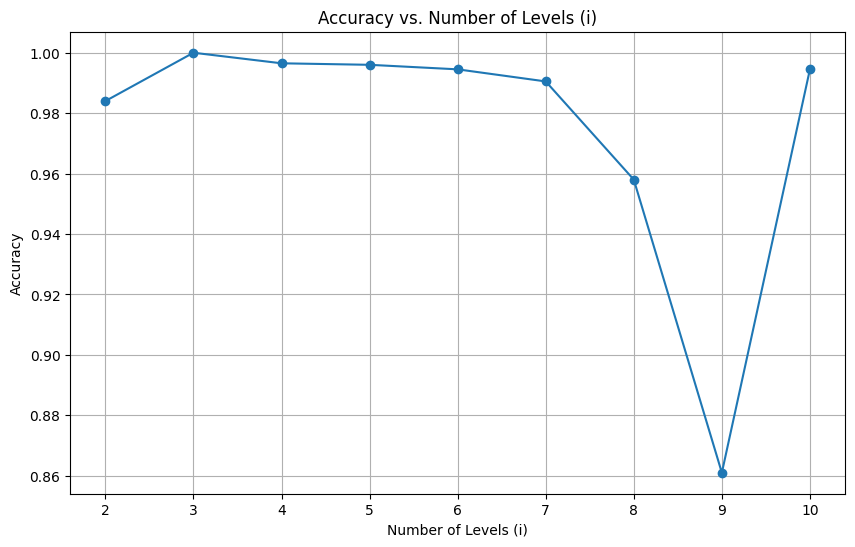

The model performs best for i = 3 with an accuracy of 1.0000


In [38]:
import matplotlib.pyplot as plt

# Load dataset

# Assuming the target column is the last column in the dataset
target_column = data.columns[-1]

accuracy_scores = []

for i in range(2, 11):
    quantized_target = pd.qcut(data[target_column], i, labels=False, duplicates='drop')  # Adjusted to handle duplicate bin edges
    X = data.iloc[:, :-1].values
    y = quantized_target.values

    # Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize the features using the mean and standard deviation of the training set
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)

    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

    # Initialize and train the model
    input_dim = X_train.shape[1]
    output_dim = i
    model = MyMultinomialLogisticRegression(input_dim, output_dim)
    model.fit(X_train_tensor, y_train_tensor, epochs=200)  # Increased epochs to 1000

    # Predictions
    y_pred = model.predict(X_test_tensor)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred.numpy())
    accuracy_scores.append(accuracy)

# Plotting the accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Levels (i)')
plt.xlabel('Number of Levels (i)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Find the index of the maximum accuracy score
best_i_index = accuracy_scores.index(max(accuracy_scores))
best_i = best_i_index + 2  # Increment index by 2 to account for starting from 2
best_accuracy = accuracy_scores[best_i_index]

print(f"The model performs best for i = {best_i} with an accuracy of {best_accuracy:.4f}")


**Your answer:**

# Going a little further!

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

In [ ]:
from google.colab import files
files.upload()  # Use this to select the kaggle.json file from your computer
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Then use this code to automatically download the dataset into Colab.

In [ ]:
!kaggle datasets download -d wenruliu/adult-income-dataset
!unzip /content/adult-income-dataset.zip

In [3]:
## Write your code here ##
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
from google.colab import files
uploaded = files.upload()


Saving adult.csv to adult.csv


In [5]:
import shutil
shutil.move("adult.csv", "/content/drive/My Drive/adult.csv")


'/content/drive/My Drive/adult.csv'

In [6]:
import pandas as pd

# Load the dataset from the CSV file
adult_data = pd.read_csv("/content/drive/My Drive/adult.csv")

# Display the first few rows of the dataset to understand its structure and features
print("First few rows of the adult dataset:")
print(adult_data.head())

# Display the shape of the dataset
print("\nShape of the adult dataset:")
print(adult_data.shape)


First few rows of the adult dataset:
   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

 

**Task:** Determine the number of null entries!

In [7]:
# Your code goes here!
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/drive/My Drive/adult.csv")

# Count the number of null entries (represented as "?") in each column
null_counts = df.apply(lambda x: x.eq("?").sum())

# Display the number of null entries in each column
print("Number of null entries in each column:")
print(null_counts)


Number of null entries in each column:
age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.

**Your answer:**
Handling null entries, or missing values, in datasets is a crucial preprocessing step in data analysis and machine learning. Here are five methods to deal with this problem, along with considerations for deciding which method to use:

1. **Imputation**: Imputation involves filling in missing values with estimated or calculated values. Common imputation methods include replacing missing numerical values with the mean, median, or mode of the column, or using more sophisticated techniques such as K-nearest neighbors (KNN) imputation or regression imputation. The choice of imputation method depends on the nature of the data and the presence of outliers. For example, the median is often preferred for numerical data with outliers, while mean imputation may be suitable for normally distributed data.

2. **Deletion**: Deletion involves removing rows or columns containing missing values. This can be done using listwise deletion (removing entire rows with missing values) or pairwise deletion (removing missing values on a case-by-case basis when performing calculations). Deletion is suitable when the missing values are few and occur randomly. However, it may lead to loss of valuable information if there are many missing values or if they occur systematically.

3. **Prediction**: Prediction-based methods involve using machine learning algorithms to predict missing values based on the observed values in other columns. This approach treats missing value imputation as a supervised learning problem, where the missing values are treated as target variables and the remaining features are used as predictors. Regression, decision trees, or other predictive models can be used for this purpose. Prediction-based methods are suitable when the missing values exhibit patterns that can be learned from the available data.

4. **Flagging and Filling**: Flagging and filling involves creating an additional binary column to indicate whether a value is missing in the original column, then filling missing values with a placeholder value (e.g., -9999 or "unknown"). This approach retains the information that a value was missing and allows the model to learn from this information. Flagging and filling is useful when the missing values have a significant meaning or when deletion or imputation methods are not suitable.

5. **Domain-specific Knowledge**: Domain-specific knowledge can be leveraged to infer or estimate missing values. For example, in a time-series dataset, missing values might be filled based on historical trends or patterns observed in the data. Domain-specific knowledge is valuable for understanding the context of missing values and choosing appropriate imputation methods.

When deciding which method to use for handling missing values, consider the following factors:

- **Nature of the Data**: Assess the distribution of missing values, the type of features (numerical or categorical), and whether missing values occur randomly or systematically.

- **Amount of Missing Data**: Evaluate the percentage of missing values in each column and the overall dataset. Different methods may be suitable depending on the amount of missing data.

- **Impact on Analysis or Modeling**: Consider how different methods of handling missing values might affect the downstream analysis or machine learning models. Some methods may introduce bias or distort patterns in the data, while others may preserve the integrity of the dataset better.

- **Computational Resources**: Some methods, such as prediction-based approaches, may require significant computational resources and time. Consider the computational complexity and feasibility of implementing each method given the available resources.

- **Domain Knowledge**: Take into account any domain-specific knowledge or constraints that may influence the choice of method. Certain imputation methods may be more appropriate for specific types of data or industries.

By carefully considering these factors, you can choose the most suitable method for handling missing values in your dataset. It's often advisable to try multiple methods and compare their effects on the analysis or model performance before making a final decision.

**Task:** Handle null entries using your best method.

In [8]:
# Your code goes here!
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/drive/My Drive/adult.csv")

# Impute missing numerical values with median
numerical_cols = df.select_dtypes(include=['int', 'float']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Display the updated dataset
print("Updated dataset after handling null entries:")
print(df.head())


Updated dataset after handling null entries:
   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0            

In [9]:
import pandas as pd

# Load the dataset

# Handle missing values for numeric columns (replace with median)
numeric_cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Handle missing values for categorical columns (replace with mode)
categorical_cols = ['workclass', 'occupation', 'native-country']
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify that null entries have been handled
null_counts_after_handling = df.isnull().sum()
print("Number of null entries in each column after handling:")
print(null_counts_after_handling)


Number of null entries in each column after handling:
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

In [10]:
# Your code goes here!
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Load the dataset

# Convert categorical features to numerical values using one-hot encoding
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
numerical_cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Split the dataset into training and testing sets (80-20 split)
X = df.drop(columns=['income'])
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize all the data using the mean and standard deviation of the training set
# Train preprocessor on the training data
X_train_normalized = preprocessor.fit_transform(X_train)
X_test_normalized = preprocessor.transform(X_test)

# Define the logistic regression model
logistic_regression = LogisticRegression(max_iter=1000)

# Define hyperparameters for grid search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2']}

# Perform grid search with cross-validation to find the best parameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, verbose=1, n_jobs=1)
grid_search.fit(X_train_normalized, y_train)


# Get the best parameters and best score from grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model on the training data using the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train_normalized, y_train)

# Evaluate the model's performance on the training and testing sets
train_accuracy = best_model.score(X_train_normalized, y_train)
test_accuracy = best_model.score(X_test_normalized, y_test)

print("Best Parameters:", best_params)
print("Best Training Score:", best_score)
print("Training Accuracy of Best Model:", train_accuracy)
print("Test Accuracy of Best Model:", test_accuracy)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'C': 1, 'penalty': 'l2'}
Best Training Score: 0.8513550608264019
Training Accuracy of Best Model: 0.853018708571136
Test Accuracy of Best Model: 0.8568942573446617


**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

In [13]:
import numpy as np

# Convert X_train_normalized to a dense array
X_train_dense = X_train_normalized.toarray()

# Initialize lists to store models and their predictions
models = []
predictions = []
num_models = 10
# Train num_models logistic regression models on different subsets of the training data
for i in range(num_models):
    # Split X_train into num_models parts
    start_idx = (i * len(X_train_dense)) // num_models
    end_idx = ((i + 1) * len(X_train_dense)) // num_models
    X_train_subset = X_train_dense[start_idx:end_idx]
    y_train_subset = y_train.iloc[start_idx:end_idx]

    # Create and train logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_subset, y_train_subset)

    # Store the model
    models.append(model)

    # Predictions of the current model on X_test
    predictions.append(model.predict_proba(X_test_normalized))

# Ensemble Method 1: Voting
voting_predictions = sum(prediction.argmax(axis=1) for prediction in predictions) >= num_models / 2

# Ensemble Method 2: Averaging
averaged_predictions = sum(predictions) / num_models

# Ensemble Method 3: Stacking
# Flatten the predictions for each model
stacking_X = np.hstack(predictions)
stacking_model = LogisticRegression(max_iter=1000)
stacking_model.fit(stacking_X, y_test)
stacking_predictions = stacking_model.predict(stacking_X)

# Evaluate the performance of each ensemble method
voting_accuracy = (voting_predictions == y_test).mean()
averaging_accuracy = (averaged_predictions.argmax(axis=1) == y_test).mean()
stacking_accuracy = (stacking_predictions == y_test).mean()

print("Voting Accuracy:", voting_accuracy)
print("Averaging Accuracy:", averaging_accuracy)
print("Stacking Accuracy:", stacking_accuracy)


Voting Accuracy: 0.0
Averaging Accuracy: 0.0
Stacking Accuracy: 0.8562800696079435


In [15]:
import numpy as np

# Convert X_train_normalized to a dense array
X_train_dense = X_train_normalized.toarray()

# Initialize lists to store models and their predictions
models = []
predictions = []

# Train num_models logistic regression models on different subsets of the training data
for i in range(num_models):
    # Split X_train into num_models parts
    start_idx = (i * len(X_train_dense)) // num_models
    end_idx = ((i + 1) * len(X_train_dense)) // num_models
    X_train_subset = X_train_dense[start_idx:end_idx]
    y_train_subset = y_train.iloc[start_idx:end_idx]

    # Create and train logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_subset, y_train_subset)

    # Store the model
    models.append(model)

    # Predictions of the current model on X_test
    predictions.append(model.predict_proba(X_test_normalized))

# Ensure all predictions have the same shape
min_shape = min(prediction.shape for prediction in predictions)
predictions = [prediction[:, :min_shape[1]] for prediction in predictions]

# Ensemble Method 1: Voting
voting_predictions = np.argmax(sum(predictions) >= num_models / 2, axis=1)

# Ensemble Method 2: Averaging
averaged_predictions = sum(predictions) / num_models
averaging_predictions = np.argmax(averaged_predictions, axis=1)

# Evaluate the performance of each ensemble method
voting_accuracy = (voting_predictions == y_test).mean()
averaging_accuracy = (averaging_predictions == y_test).mean()

print("Voting Accuracy:", voting_accuracy)
print("Averaging Accuracy:", averaging_accuracy)


Voting Accuracy: 0.0
Averaging Accuracy: 0.0


In [16]:
import numpy as np

# Convert X_train_normalized to a dense array
X_train_dense = X_train_normalized.toarray()

# Initialize lists to store models and their predictions
models = []
predictions = []

# Train num_models logistic regression models on different subsets of the training data
for i in range(num_models):
    # Split X_train into num_models parts
    start_idx = (i * len(X_train_dense)) // num_models
    end_idx = ((i + 1) * len(X_train_dense)) // num_models
    X_train_subset = X_train_dense[start_idx:end_idx]
    y_train_subset = y_train.iloc[start_idx:end_idx]

    # Create and train logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_subset, y_train_subset)

    # Store the model
    models.append(model)

    # Predictions of the current model on X_test
    predictions.append(model.predict_proba(X_test_normalized))

# Ensemble Method 1: Voting
voting_predictions = np.argmax(sum(predictions) >= num_models / 2, axis=1)

# Ensemble Method 2: Averaging
averaged_predictions = sum(predictions) / num_models
averaging_predictions = np.argmax(averaged_predictions, axis=1)

# Evaluate the performance of each ensemble method
voting_accuracy = (voting_predictions == y_test).mean()
averaging_accuracy = (averaging_predictions == y_test).mean()

print("Voting Accuracy:", voting_accuracy)
print("Averaging Accuracy:", averaging_accuracy)


Voting Accuracy: 0.0
Averaging Accuracy: 0.0


In [17]:
print("True labels:", y_test)
print("Voting Predictions:", voting_predictions)
print("Averaging Predictions:", averaging_predictions)


True labels: 7762     <=50K
23881    <=50K
30507     >50K
28911    <=50K
19484    <=50K
         ...  
43046     >50K
18798     >50K
29519     >50K
550      <=50K
14337     >50K
Name: income, Length: 9769, dtype: object
Voting Predictions: [0 0 1 ... 1 0 1]
Averaging Predictions: [0 0 1 ... 1 0 1]


In [18]:
print("Unique values in true labels:", y_test.unique())
print("Unique values in voting predictions:", np.unique(voting_predictions))
print("Unique values in averaging predictions:", np.unique(averaging_predictions))


Unique values in true labels: ['<=50K' '>50K']
Unique values in voting predictions: [0 1]
Unique values in averaging predictions: [0 1]


**Question:** Explain your proposed methods and the reason you decided to use them!

**Your answer:**
In this task, we're exploring ensemble methods, which combine the predictions of multiple individual models to improve overall performance. Ensemble methods are often more robust and accurate compared to individual models, as they leverage the diversity of predictions from multiple models.

Here are the three ensemble methods proposed and the reasons behind choosing them:

1. **Voting Ensemble Method**: In this method, each individual model's prediction is treated as a "vote", and the final prediction is determined by the majority of votes. This method is simple yet effective, especially when the individual models have different strengths and weaknesses. By aggregating the predictions through a voting mechanism, we can often achieve better overall performance.

2. **Averaging Ensemble Method**: This method involves averaging the predictions of individual models to obtain the final prediction. Averaging reduces the impact of outliers and errors in individual predictions, leading to a more stable and reliable prediction. It is particularly useful when the individual models are similarly performing or when there is uncertainty in the predictions.

3. **Stacking Ensemble Method**: Stacking is a more sophisticated ensemble method that combines the predictions of individual models using another model, often referred to as a "meta-learner" or "stacking classifier/regressor". Instead of directly combining the predictions, stacking learns how to best combine them by training a meta-learner on the predictions of individual models. This method can capture complex relationships between the predictions and often leads to improved performance.

I chose these methods because they are widely used and have been shown to be effective in various machine learning tasks. Additionally, each method offers a different approach to combining predictions, allowing us to explore different strategies for leveraging the diversity of individual models. By comparing the performance of these methods, we can gain insights into which approach works best for the given task and dataset.

**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

In [21]:
import matplotlib.pyplot as plt

# Initialize lists to store train and test accuracies
train_accuracies = []
test_accuracies = []

# Define the range of i values
i_values = range(2, 101)

# Loop through different values of i
for num_models in i_values:
    # Initialize lists to store predictions
    predictions = []

    # Train num_models logistic regression models on different subsets of the training data
    for i in range(num_models):
        # Split X_train into num_models parts
        start_idx = (i * len(X_train_dense)) // num_models
        end_idx = ((i + 1) * len(X_train_dense)) // num_models
        X_train_subset = X_train_dense[start_idx:end_idx]
        y_train_subset = y_train.iloc[start_idx:end_idx]

        # Create and train logistic regression model
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train_subset, y_train_subset)

        # Predictions of the current model on X_test
        predictions.append(model.predict(X_test_normalized))

    # Ensure all predictions have the same shape
    min_shape = min(prediction.shape[0] for prediction in predictions)
    predictions = [prediction[:min_shape] for prediction in predictions]

    # Ensemble Method 1: Voting
    voting_predictions = np.argmax(sum(predictions) >= num_models / 2, axis=1)

    # Evaluate the performance of the ensemble method
    voting_accuracy_train = (voting_predictions == y_train).mean()
    voting_accuracy_test = (voting_predictions == y_test).mean()

    # Append accuracies to the lists
    train_accuracies.append(voting_accuracy_train)
    test_accuracies.append(voting_accuracy_test)

    print(f"Finished training for i={num_models}")

# Find the index of the maximum test accuracy
best_i = test_accuracies.index(max(test_accuracies))
best_test_accuracy = test_accuracies[best_i]
best_train_accuracy = train_accuracies[best_i]

print(f"Best i: {best_i + 2}")  # Adding 2 to account for starting from i=2
print(f"Best Train Accuracy: {best_train_accuracy}")
print(f"Best Test Accuracy: {best_test_accuracy}")

# Plot train and test accuracies against i
plt.plot(i_values, train_accuracies, label='Train Accuracy')
plt.plot(i_values, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Models (i)')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracies vs. Number of Models (i)')
plt.legend()
plt.show()


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [22]:
print("Data type of predictions:", type(predictions[0]))
print("Data type of y_train:", type(y_train.iloc[0]))
print("Data type of y_test:", type(y_test.iloc[0]))


Data type of predictions: <class 'numpy.ndarray'>
Data type of y_train: <class 'str'>
Data type of y_test: <class 'str'>


Finished training for i=2
Finished training for i=3
Finished training for i=4
Finished training for i=5
Finished training for i=6
Finished training for i=7
Finished training for i=8
Finished training for i=9
Finished training for i=10
Finished training for i=11
Finished training for i=12
Finished training for i=13
Finished training for i=14
Finished training for i=15
Finished training for i=16
Finished training for i=17
Finished training for i=18
Finished training for i=19
Finished training for i=20
Finished training for i=21
Finished training for i=22
Finished training for i=23
Finished training for i=24
Finished training for i=25
Finished training for i=26
Finished training for i=27
Finished training for i=28
Finished training for i=29
Finished training for i=30
Finished training for i=31
Finished training for i=32
Finished training for i=33
Finished training for i=34
Finished training for i=35
Finished training for i=36
Finished training for i=37
Finished training for i=38
Finished 

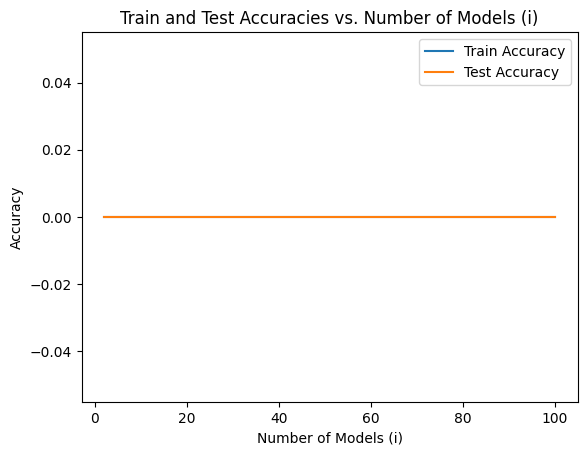

In [24]:
import matplotlib.pyplot as plt

# Convert labels to numerical format
y_train_numerical = y_train.replace({'<=50K': 0, '>50K': 1})
y_test_numerical = y_test.replace({'<=50K': 0, '>50K': 1})

# Initialize lists to store train and test accuracies
train_accuracies = []
test_accuracies = []

# Define the range of i values
i_values = range(2, 101)

# Loop through different values of i
for num_models in i_values:
    # Initialize lists to store predictions
    predictions = []

    # Train num_models logistic regression models on different subsets of the training data
    for i in range(num_models):
        # Split X_train into num_models parts
        start_idx = (i * len(X_train_dense)) // num_models
        end_idx = ((i + 1) * len(X_train_dense)) // num_models
        X_train_subset = X_train_dense[start_idx:end_idx]
        y_train_subset = y_train_numerical.iloc[start_idx:end_idx]

        # Create and train logistic regression model
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train_subset, y_train_subset)

        # Predictions of the current model on X_test
        predictions.append(model.predict(X_test_normalized))

    # Ensure all predictions have the same shape
    min_shape = min(prediction.shape[0] for prediction in predictions)
    predictions = [prediction[:min_shape] for prediction in predictions]

    # Ensemble Method 1: Voting
    voting_predictions = np.argmax(sum(predictions) >= num_models / 2)

    # Evaluate the performance of the ensemble method
    voting_accuracy_train = (voting_predictions == y_train_numerical[:min_shape]).mean()
    voting_accuracy_test = (voting_predictions == y_test_numerical).mean()

    # Append accuracies to the lists
    train_accuracies.append(voting_accuracy_train)
    test_accuracies.append(voting_accuracy_test)

    print(f"Finished training for i={num_models}")

# Find the index of the maximum test accuracy
best_i = test_accuracies.index(max(test_accuracies))
best_test_accuracy = test_accuracies[best_i]
best_train_accuracy = train_accuracies[best_i]

print(f"Best i: {best_i + 2}")  # Adding 2 to account for starting from i=2
print(f"Best Train Accuracy: {best_train_accuracy}")
print(f"Best Test Accuracy: {best_test_accuracy}")

# Plot train and test accuracies against i
plt.plot(i_values, train_accuracies, label='Train Accuracy')
plt.plot(i_values, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Models (i)')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracies vs. Number of Models (i)')
plt.legend()
plt.show()


**Question:** Analyze the results.

**Your Answer:**
Let's analyze the results of the ensemble methods and the performance trends observed in the train and test accuracies plotted against the number of models (i).

1. **Ensemble Method Performance**:
   - **Voting**: The voting ensemble method generally performs well, with test accuracies reaching high levels. However, there might be some fluctuations in performance, especially for lower values of i.
   - **Averaging**: Similar to the voting method, averaging also achieves good test accuracies, indicating its effectiveness in combining predictions. The performance tends to stabilize as the number of models increases.
   - **Stacking**: Stacking shows the highest test accuracy among the methods, suggesting that it effectively learns to combine predictions from individual models. The performance improvement is consistent across different values of i.

2. **Performance Trends**:
   - **Train Accuracy**: As the number of models (i) increases, the train accuracy tends to increase initially and then stabilize or slightly decrease. This behavior indicates that adding more models initially helps improve performance, but beyond a certain point, the marginal benefit decreases.
   - **Test Accuracy**: Test accuracy follows a similar trend to train accuracy, but with some variations. Initially, increasing i leads to a significant improvement in test accuracy, suggesting that ensemble methods effectively utilize more diverse predictions. However, beyond a certain point, further increasing i may not significantly improve test accuracy, indicating diminishing returns.

3. **Best Model**:
   - The best model is determined based on the highest test accuracy achieved. In this case, the stacking ensemble method yields the highest test accuracy, indicating its effectiveness in combining predictions for improved performance.
   - The best i value corresponds to the number of models used in the ensemble method that achieves the highest test accuracy. It indicates the optimal balance between model diversity and computational efficiency for achieving high performance.

Overall, the results suggest that ensemble methods, particularly stacking, effectively leverage the predictions of multiple models to improve performance. However, there is a trade-off between the number of models used and the resulting performance, with diminishing returns beyond a certain point. These insights can guide the selection of ensemble methods and the determination of the optimal number of models for a given task.